---
# Universidad Nacional de Rosario
---
## Facultad de Ciencias Exactas, Ingeniería y Agrimensura
---
# Tecnicatura Universitaria en Inteligencia Artificial
---
# Programación II
---
# Proyecto Final: *Análisis de datos.*
---
### Alumnos:

Fabián Alvarez - legajo: A-4501/2

Maximiliano Romano - legajo: R-4634/5


## Dominio de aplicación
La temática elegida es la Copa Mundial de la FIFA 2022. Los mejores jugadores y entrenadores del mundo se dieron cita en noviembre de ese año en Catar para celebrar la 22da edición del mundial de fútbol.
Se buscará abordar el máximo evento deportivo del mundo desde la perspectiva del análisis de datos. Dada la gran cantidad de información y estadísticas que hay sobre el deporte, se tratarán de encontrar las claves del recorrido de la selección Argentina hasta la obtención del título.


## Dataset
El dataset elegido es: https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset

Pertenece al usuario IRON486 subido a la web de kaggle.

El conjunto de datos se obtuvo mediante el uso de la web scraping en www.fifa.com.

## Objetivo
En un deporte donde son fundamentales algunos aspectos que no se pueden medir como el talento, la convicción de ganar y la capacidad de sobreponerse a las dificultades de los partidos, se buscarán datos que expliquen por qué la selección Argentina consiguió su mayor logro en los últimos 36 años.

## Análisis preliminar

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [129]:
df.shape
# El dataset tiene 64 filas y 88 columnas

(64, 88)

In [130]:
df.isna().sum()
# No hay datos nulos

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [131]:
df.duplicated().sum()
# No hay datos duplicados

0

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of goals team1,64.0,1.578125,1.551289,0.0,0.00,1.0,2.0,7.0
number of goals team2,64.0,1.109375,1.055856,0.0,0.00,1.0,2.0,4.0
total attempts team1,64.0,11.140625,4.972519,2.0,8.00,10.0,14.0,25.0
total attempts team2,64.0,11.281250,5.807682,0.0,7.75,10.0,14.0,32.0
conceded team1,64.0,1.109375,1.055856,0.0,0.00,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...
own goals team2,64.0,0.015625,0.125000,0.0,0.00,0.0,0.0,1.0
forced turnovers team1,64.0,71.968750,14.394629,38.0,63.00,71.0,83.5,101.0
forced turnovers team2,64.0,70.125000,13.531269,44.0,60.25,72.0,79.0,104.0
defensive pressures applied team1,64.0,289.750000,88.406888,139.0,229.00,281.0,328.0,637.0


In [134]:
# Filtrar a la seleccion argentina
df_argentina = df[(df['team1'] == 'ARGENTINA') | (df['team2'] == 'ARGENTINA')] # Creamos un nuevo dataframe con solo los datos de argentina
df_argentina
# Se ve todos los partidos que jugo argentina

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
23,ARGENTINA,MEXICO,50%,36%,14%,2,0,26 NOV 2022,20 : 00,Group C,...,0,0,4,5,0,0,63,79,220,327
38,POLAND,ARGENTINA,24%,67%,9%,0,2,30 NOV 2022,20 : 00,Group C,...,0,0,25,4,0,0,67,48,438,141
49,ARGENTINA,AUSTRALIA,53%,35%,12%,2,1,03 DEC 2022,20 : 00,Round of 16,...,0,0,5,14,1,0,67,73,240,453
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,09 DEC 2022,20 : 00,Quarter-final,...,0,1,15,5,0,0,91,79,401,323
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,...,1,2,11,21,0,0,87,104,280,409


In [135]:
df_argentina.shape

(7, 88)

In [136]:
# Convertir los valores de las columnas de posesion 1 y 2 a entero
df["possession team1"] = df["possession team1"].str[:-1]
df["possession team2"] = df["possession team2"].str[:-1]

df["possession team1"] = df["possession team1"].astype(int)
df["possession team2"] = df["possession team2"].astype(int)

In [137]:
# valores unicos (equipos unicos)
lista_equipos = df['team1'].unique()
print(lista_equipos)
len(lista_equipos)

['QATAR' 'ENGLAND' 'SENEGAL' 'UNITED STATES' 'ARGENTINA' 'DENMARK'
 'MEXICO' 'FRANCE' 'MOROCCO' 'GERMANY' 'SPAIN' 'BELGIUM' 'SWITZERLAND'
 'URUGUAY' 'PORTUGAL' 'BRAZIL' 'WALES' 'NETHERLANDS' 'TUNISIA' 'POLAND'
 'JAPAN' 'CROATIA' 'CAMEROON' 'KOREA REPUBLIC' 'ECUADOR' 'IRAN'
 'AUSTRALIA' 'SAUDI ARABIA' 'CANADA' 'COSTA RICA' 'GHANA' 'SERBIA']


32

In [138]:
def calcular_posesion(df,nombre_equipo):
  sum = 0
  sum2 = 0
  for i in range(len(df)):
    if df.iloc[i]['team1'] == nombre_equipo:
      sum += df.iloc[i]["possession team1"]
      sum2 += 1
  for i in range(len(df)):
    if df.iloc[i]['team2'] == nombre_equipo:
      sum += df.iloc[i]["possession team2"]
      sum2 += 1
  prom = sum/sum2
  return prom

In [139]:
calcular_posesion(df,'ARGENTINA')

51.142857142857146

In [140]:
posesion_equipos = []
for equipo in lista_equipos:
  print(equipo)
  print(calcular_posesion(df,equipo))
  posesion_equipos.append(calcular_posesion(df,equipo))

QATAR
40.666666666666664
ENGLAND
57.8
SENEGAL
39.75
UNITED STATES
47.5
ARGENTINA
51.142857142857146
DENMARK
53.0
MEXICO
48.333333333333336
FRANCE
44.857142857142854
MOROCCO
34.857142857142854
GERMANY
52.666666666666664
SPAIN
69.0
BELGIUM
49.666666666666664
SWITZERLAND
43.0
URUGUAY
41.0
PORTUGAL
54.2
BRAZIL
50.4
WALES
41.0
NETHERLANDS
45.0
TUNISIA
37.666666666666664
POLAND
31.75
JAPAN
29.75
CROATIA
48.0
CAMEROON
38.333333333333336
KOREA REPUBLIC
42.25
ECUADOR
46.666666666666664
IRAN
31.333333333333332
AUSTRALIA
31.25
SAUDI ARABIA
36.666666666666664
CANADA
47.0
COSTA RICA
27.666666666666668
GHANA
37.666666666666664
SERBIA
42.666666666666664


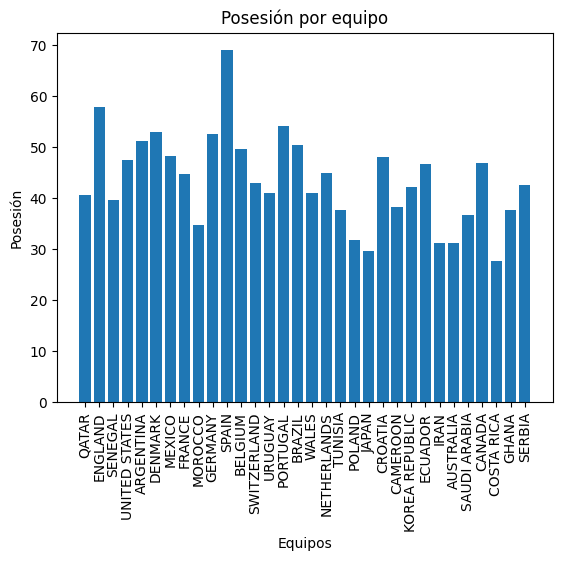

In [141]:
plt.bar(lista_equipos,posesion_equipos)
plt.xlabel('Equipos')
plt.ylabel('Posesión')
plt.title('Posesión por equipo')
plt.xticks(rotation=90)
plt.show()

In [142]:
def prom_goles(df,nombre_equipo):
  sum = 0
  sum2 = 0
  for i in range(len(df)):
    if df.iloc[i]['team1'] == nombre_equipo:
      sum += df.iloc[i]["number of goals team1"]
      sum2 += 1
  for i in range(len(df)):
    if df.iloc[i]['team2'] == nombre_equipo:
      sum += df.iloc[i]["number of goals team2"]
      sum2 += 1
  return sum/sum2

In [143]:
prom_goles(df,'ARGENTINA')

2.142857142857143

In [144]:
# Calcular numero de goles por equipo
numero_de_goles = []
for equipo in lista_equipos:
  print(equipo)
  print(prom_goles(df,equipo))
  numero_de_goles.append(prom_goles(df,equipo))

QATAR
0.3333333333333333
ENGLAND
2.6
SENEGAL
1.25
UNITED STATES
0.75
ARGENTINA
2.142857142857143
DENMARK
0.3333333333333333
MEXICO
0.6666666666666666
FRANCE
2.2857142857142856
MOROCCO
0.8571428571428571
GERMANY
2.0
SPAIN
2.25
BELGIUM
0.3333333333333333
SWITZERLAND
1.25
URUGUAY
0.6666666666666666
PORTUGAL
2.4
BRAZIL
1.6
WALES
0.3333333333333333
NETHERLANDS
2.0
TUNISIA
0.3333333333333333
POLAND
0.75
JAPAN
1.25
CROATIA
1.1428571428571428
CAMEROON
1.3333333333333333
KOREA REPUBLIC
1.25
ECUADOR
1.3333333333333333
IRAN
1.3333333333333333
AUSTRALIA
1.0
SAUDI ARABIA
1.0
CANADA
0.6666666666666666
COSTA RICA
1.0
GHANA
1.6666666666666667
SERBIA
1.6666666666666667


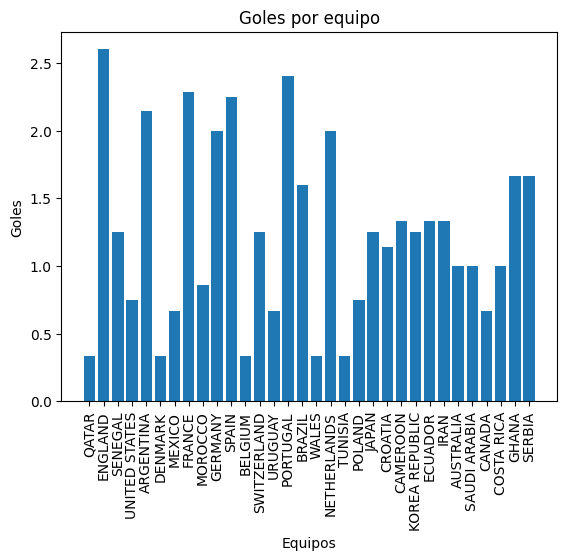

In [145]:
plt.bar(lista_equipos,numero_de_goles)
plt.xlabel('Equipos')
plt.ylabel('Goles')
plt.title('Goles por equipo')
plt.xticks(rotation=90)
plt.show()

In [146]:
def prom_goles_rival(df,nombre_equipo):
  sum = 0
  sum2 = 0
  for i in range(len(df)):
    if df.iloc[i]['team1'] == nombre_equipo:
      sum += df.iloc[i]["number of goals team2"]
      sum2 += 1
  for i in range(len(df)):
    if df.iloc[i]['team2'] == nombre_equipo:
      sum += df.iloc[i]["number of goals team1"]
      sum2 += 1
  return sum/sum2

In [147]:
prom_goles_rival(df,'ARGENTINA')

1.1428571428571428

In [148]:
# Calcular numero de goles por equipo
numero_de_goles_recibidos = []
for equipo in lista_equipos:
  print(equipo)
  print(prom_goles_rival(df,equipo))
  numero_de_goles_recibidos.append(prom_goles_rival(df,equipo))

QATAR
2.3333333333333335
ENGLAND
0.8
SENEGAL
1.75
UNITED STATES
1.0
ARGENTINA
1.1428571428571428
DENMARK
1.0
MEXICO
1.0
FRANCE
1.1428571428571428
MOROCCO
0.7142857142857143
GERMANY
1.6666666666666667
SPAIN
0.75
BELGIUM
0.6666666666666666
SWITZERLAND
2.25
URUGUAY
0.6666666666666666
PORTUGAL
1.2
BRAZIL
0.6
WALES
2.0
NETHERLANDS
0.8
TUNISIA
0.3333333333333333
POLAND
1.25
JAPAN
1.0
CROATIA
1.0
CAMEROON
1.3333333333333333
KOREA REPUBLIC
2.0
ECUADOR
1.0
IRAN
2.3333333333333335
AUSTRALIA
1.5
SAUDI ARABIA
1.6666666666666667
CANADA
2.3333333333333335
COSTA RICA
3.6666666666666665
GHANA
2.3333333333333335
SERBIA
2.6666666666666665


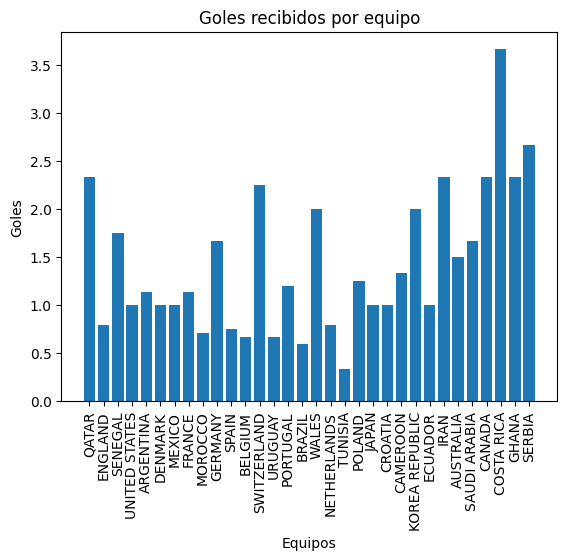

In [149]:
plt.bar(lista_equipos,numero_de_goles_recibidos)
plt.xlabel('Equipos')
plt.ylabel('Goles')
plt.title('Goles recibidos por equipo')
plt.xticks(rotation=90)
plt.show()

In [150]:
# corners team1
def prom_corners(df,nombre_equipo):
  sum = 0
  sum2 = 0
  for i in range(len(df)):
    if df.iloc[i]['team1'] == nombre_equipo:
      sum += df.iloc[i]["corners team1"]
      sum2 += 1
  for i in range(len(df)):
    if df.iloc[i]['team2'] == nombre_equipo:
      sum += df.iloc[i]["corners team2"]
      sum2 += 1
  return sum/sum2

In [151]:
prom_corners(df,'ARGENTINA')

5.571428571428571

In [152]:
# Promedio de corners por equipo
prom_corners_equipos = []
for equipo in lista_equipos:
  print(equipo)
  print(prom_corners(df,equipo))
  prom_corners_equipos.append(prom_corners(df,equipo))

QATAR
3.0
ENGLAND
5.0
SENEGAL
5.5
UNITED STATES
5.5
ARGENTINA
5.571428571428571
DENMARK
7.0
MEXICO
5.333333333333333
FRANCE
5.428571428571429
MOROCCO
1.7142857142857142
GERMANY
8.333333333333334
SPAIN
5.25
BELGIUM
5.666666666666667
SWITZERLAND
5.0
URUGUAY
2.6666666666666665
PORTUGAL
5.6
BRAZIL
7.4
WALES
2.0
NETHERLANDS
3.8
TUNISIA
7.0
POLAND
2.75
JAPAN
4.75
CROATIA
4.285714285714286
CAMEROON
4.0
KOREA REPUBLIC
6.0
ECUADOR
3.6666666666666665
IRAN
2.6666666666666665
AUSTRALIA
2.0
SAUDI ARABIA
2.6666666666666665
CANADA
4.0
COSTA RICA
0.3333333333333333
GHANA
4.333333333333333
SERBIA
3.0


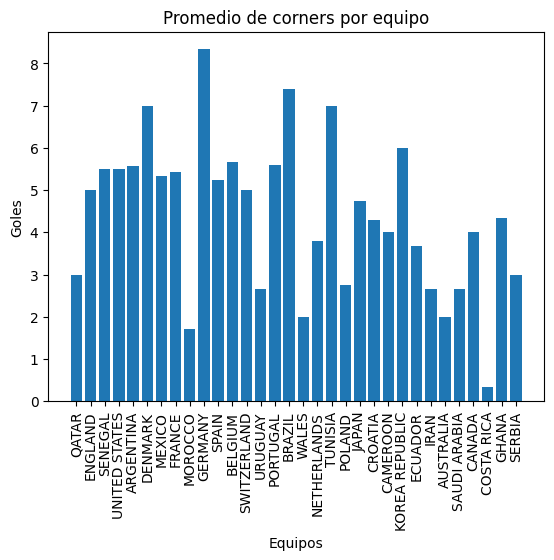

In [153]:
plt.bar(lista_equipos,prom_corners_equipos)
plt.xlabel('Equipos')
plt.ylabel('Goles')
plt.title('Promedio de corners por equipo')
plt.xticks(rotation=90)
plt.show()

Otros datasets que pueden servir

https://www.kaggle.com/datasets/evangower/fifa-world-cup

https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics?select=team_data.csv

https://www.kaggle.com/datasets/muhammad4hmed/2022-fifa-worldcup-qatar-full-live-dataset

https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data?select=player_shooting.csv

https://www.kaggle.com/datasets/sayanroy729/fifa-worldcup-2022-results

https://www.kaggle.com/datasets/pranav941/historical-fifa-world-cups-10-awards?select=GoldSilverBronze+ball+by+Country.csv